<a href="https://colab.research.google.com/github/mikeamerenda/Project-2/blob/main/Project_2_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import all libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df= pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# checking all data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Checking for duplicates
df.duplicated().any()

False

No duplicates were found in the dataset

In [7]:
# Checking for any missing data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No data is missing from the data set

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [10]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [11]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [12]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [13]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

No inconsitencies in any of the categorical data

In [14]:
# Statistical analysis
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Shows minimun cholesteral and RestingBP have a minimun of 0 which seems unusual so we will explore this data and see if it needs to be dropped.

In [15]:
df.loc[df['Cholesterol']== 0,:]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [16]:
df['Cholesterol'].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
355      1
354      1
353      1
349      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

This shows that their are 172 rows of data with a 0 for cholesteral since that is a large number of missed data I am going to drop the column for cholesteral since a large amount is incorrect and shows 0

In [17]:
# We will drop the Cholesterol column 
df.drop(columns=['Cholesterol',], inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0


In [18]:
df.loc[df['RestingBP']== 0,:]

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,Normal,155,N,1.5,Flat,1


We will drop this row are it shows the RestingBP as 0

In [19]:
# Dropping Row 449
df= df.drop(index = 449)

In [20]:
len(df)

917

In [21]:
df['FastingBS'].value_counts()

0    703
1    214
Name: FastingBS, dtype: int64

In [22]:
df.describe()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,1.000000,202.000000,6.200000,1.000000


Visualizations of Catergorical Variables

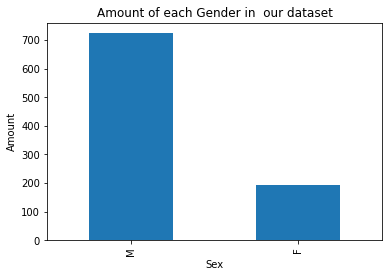

In [23]:
df['Sex'].value_counts().plot(kind = 'bar');
plt.xlabel('Sex')
plt.ylabel('Amount')
plt.title('Amount of each Gender in  our dataset');

We have more Males than Females in our Data

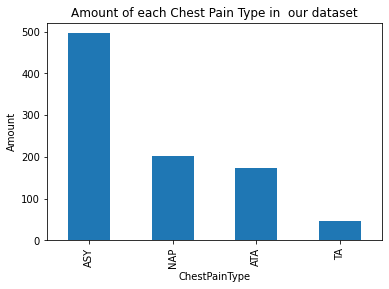

In [24]:
df['ChestPainType'].value_counts().plot(kind = 'bar');
plt.xlabel('ChestPainType')
plt.ylabel('Amount')
plt.title('Amount of each Chest Pain Type in  our dataset');

A large group of people fall under ASY for the type of chest pain they are having 

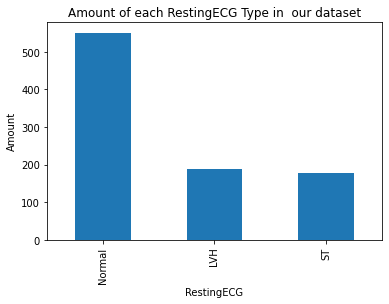

In [25]:
df['RestingECG'].value_counts().plot(kind = 'bar');
plt.xlabel('RestingECG')
plt.ylabel('Amount')
plt.title('Amount of each RestingECG Type in  our dataset');

A majority of people have Normal RestingECG in our data

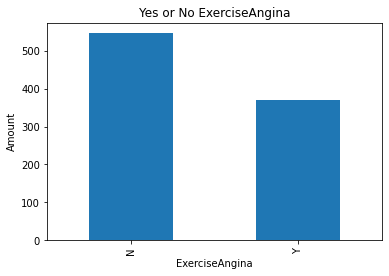

In [26]:
df['ExerciseAngina'].value_counts().plot(kind = 'bar');	
plt.xlabel('ExerciseAngina')
plt.ylabel('Amount')
plt.title('Yes or No ExerciseAngina');

More poeople do not have Exercise Enduced Angina in our dataset

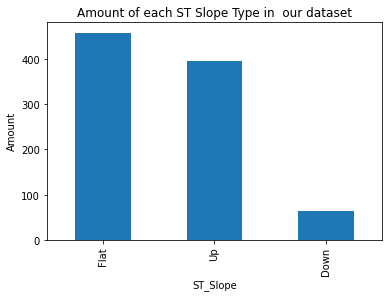

In [27]:
df['ST_Slope'].value_counts().plot(kind = 'bar');	
plt.xlabel('ST_Slope')
plt.ylabel('Amount')
plt.title('Amount of each ST Slope Type in  our dataset');

Majority of the data shows Flat or Up for the St Slope where only a few show down

Creating histograms and boxplots to visualize univariate distributions of numerical variables

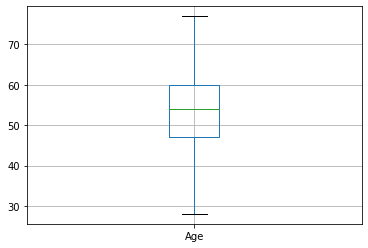

In [28]:
df.boxplot(column = 'Age');

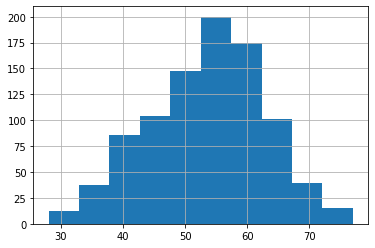

In [29]:
df['Age'].hist();

There are no outliers for Age in our distribution The highest points are in the 50-60 age range but they seem reasonable

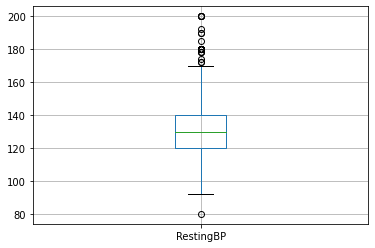

In [30]:
df.boxplot(column = 'RestingBP');

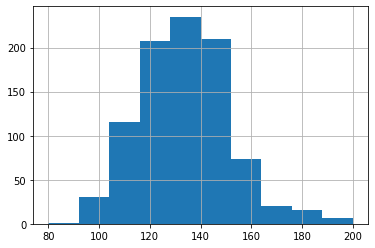

In [31]:
df['RestingBP'].hist();

There are a few outliers for RestingBP at the high end, but they seem possible. The RestingBP is skewed (far more data points in the middle)

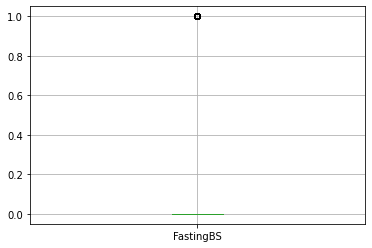

In [32]:
df.boxplot(column = 'FastingBS');

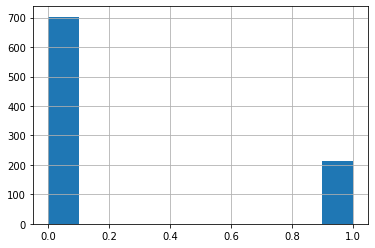

In [33]:
df['FastingBS'].hist();

The FastingBS is skewed (far more data points on the Low Side)

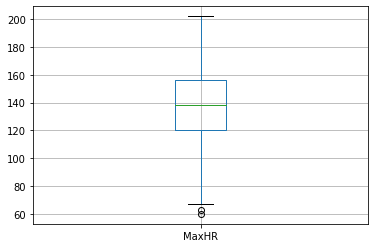

In [34]:
df.boxplot(column = 'MaxHR');

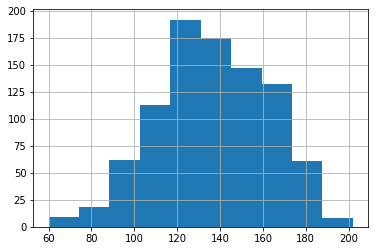

In [35]:
df['MaxHR'].hist();

There are a few outliers for RestingBP on both the high and low end, but they seem possible. 

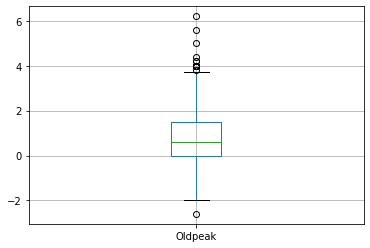

In [36]:
df.boxplot(column = 'Oldpeak');

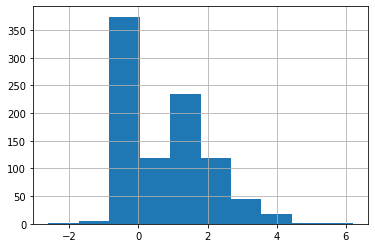

In [37]:
df['Oldpeak'].hist();

We have outliers on both ends (High and Low). They seem resonable. 

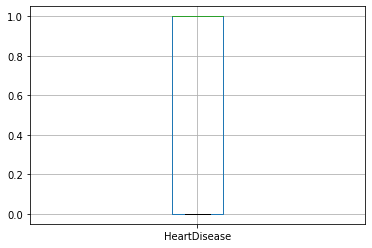

In [38]:
df.boxplot(column = 'HeartDisease');

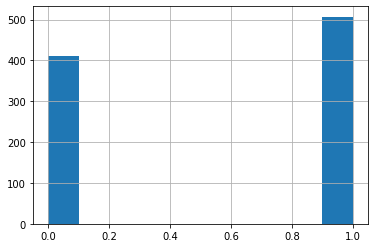

In [39]:
df['HeartDisease'].hist();

More People have Heart Disease in our data set

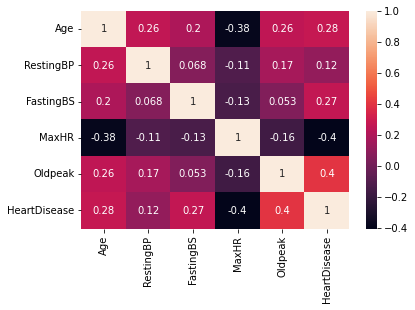

In [40]:
# Explore the relationships between variables with bivariate visuals
corr = df.corr()
sns.heatmap(corr, annot = True);

Looks like we have minimal correlation between Heart Disease and MaxHR (-.4) and HeartDeisease and OldPeak (.4). We also have a low correlation (-.38) between two features Age and MaxHR

In [41]:
df.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,0,Normal,122,N,0.0,Up,0


In [42]:
# Identify Target and Feautures Matrix
X= df.drop(columns = 'HeartDisease')
y = df['HeartDisease']

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [70]:
# Train-Test-Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [71]:
# Pre-Process for Machine Learning with a pipeline
# Dummy encode the categorical feature(s) using OneHotEncoder (this will be part of our pipeline)
# Scale the quantitative feature(s) using StandardScaler so it (this will be part of our pipeline)

# There is only one categorical feature (column) here, but it can be very helpful to define a variable for each type of feature...be careful defining features based only on dtype. If needed change the dtype to match your data.
cat_feat= make_column_selector(dtype_include = 'object')
# This will identify all of the quantitative features (columns)
quant_feat = make_column_selector(dtype_include = 'number')

# Instantiate the column transformers you want to use
encoder = OneHotEncoder(handle_unknown = 'ignore')
scaler = StandardScaler()

# Now make the column transformer...this matches the transformations that we want with the appropriate columns.
column_transformer = make_column_transformer((encoder, cat_feat), (scaler, quant_feat))

# We will add our column_transformer to our pipeline when we make it

In [72]:
column_transformer

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0933e59c10>),
                                ('standardscaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0933e59bd0>)],
                  verbose=False)

KNN Model for Classification

In [73]:
# instatiate each step with defaults 
knn = KNeighborsClassifier()
# Then add each to the pipeline
knn_pipe = make_pipeline(column_transformer, knn)
# now fit the pipe on the training data
knn_pipe.fit(X_train, y_train)
# Print the accuracy of the training and test set
print('Training Accuracy', accuracy_score(y_train, knn_pipe.predict(X_train)))
print('Testing Accuracy', accuracy_score(y_test, knn_pipe.predict(X_test)))

Training Accuracy 0.8893740902474527
Testing Accuracy 0.8739130434782608


We can se that this model may be over fit as the Training data accuracy score was higher than the Testing

In [74]:
knn_pipe.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f...
                                                 ('standardscaler',
                                      

In [75]:
knn_params = {'kneighborsclassifier__n_neighbors' : [2, 5, 10],
          'kneighborsclassifier__weights' : ['uniform', 'distance'], 
          'kneighborsclassifier__algorithm' : ['auto', 'ball_tree'], 
          'kneighborsclassifier__p' : [1,2]}

In [76]:
# Instantiate the Gridsearch with the KNN pipeline and the knn_params 
knn_gs = GridSearchCV(knn_pipe, knn_params)
# Now Fit the new model
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='ignore',
                    

In [77]:
# Showing what parameters gave the best results 
knn_gs.best_params_

{'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__n_neighbors': 10,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'distance'}

In [78]:
print('KNN_GS Training Score:', accuracy_score(y_train, knn_gs.predict(X_train)))
print('KNN_GS Testing Score:', accuracy_score(y_test, knn_gs.predict(X_test)))

KNN_GS Training Score: 1.0
KNN_GS Testing Score: 0.8739130434782608


After Tuning the Parameters we can See that the Accuracy score of both the 
Training and Testing has increased, but it still looks to be overfit

Random Forest for Classification Model

In [79]:
# First instatiate each step with defaults 
rf = RandomForestClassifier()
# Then add each to the pipeline
rf_pipe = make_pipeline(column_transformer, rf)
# now fit the pipe on the training data
rf_pipe.fit(X_train, y_train)
# Print the accuracy of the training set and test set
print('Training Accuracy', accuracy_score(y_train, rf_pipe.predict(X_train)))
print('Testing Accuracy', accuracy_score(y_test, rf_pipe.predict(X_test)))

Training Accuracy 1.0
Testing Accuracy 0.8652173913043478


We have a perfect accuracy Score for training and a very high accuracy score for Testing data. This model has performed excemptionally well on our data

In [80]:
rf_pipe.get_params()

{'columntransformer': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('onehotencoder',
                                  OneHotEncoder(categories='auto', drop=None,
                                                dtype=<class 'numpy.float64'>,
                                                handle_unknown='ignore',
                                                sparse=True),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0933e59c10>),
                                 ('standardscaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0933e59bd0>)],
                   verbose=False),
 'columntransformer__n_jobs': None,
 'columntransf

In [81]:
# Define the hyperparameters to test
rf_params = {'randomforestclassifier__max_depth' : [None, 10],
             'randomforestclassifier__n_estimators' : [100,300,500],
             'randomforestclassifier__min_samples_split' : [2, 4]}

In [82]:
# Instantiate the Gridsearch with the Random Forest pipeline
rf_gs = GridSearchCV(rf_pipe, rf_params)
# Now Fit the new model
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='ignore',
                    

In [83]:
# See which hyperparameters gave the best results
rf_gs.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__min_samples_split': 4,
 'randomforestclassifier__n_estimators': 100}

In [84]:
print('RF_GS Training Score:', accuracy_score(y_train, rf_gs.predict(X_train)))
print('RF_GS Testing Score:', accuracy_score(y_test, rf_gs.predict(X_test)))

RF_GS Training Score: 0.9665211062590975
RF_GS Testing Score: 0.8739130434782608


Tuning the parameters did not increase the accuracy scores for either the testing or the training data for our model. This is very reasonable as the original model had very high scores

In [85]:
from sklearn.metrics import plot_confusion_matrix

In [86]:
from sklearn.metrics import recall_score, precision_score, \
f1_score, classification_report, confusion_matrix

We will now Look at all Metrics of both models created

In [87]:
def evaluate_classification(y_true, y_test, average=None):
  accuracy = accuracy_score(y_true, y_test)
  recall = recall_score(y_true, y_test, average=average)
  precision = precision_score(y_true, y_test, average=average)
  f1 = f1_score(y_true, y_test, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

In [88]:
print('KNN_GS Training Metrics\n')
evaluate_classification(y_train, knn_gs.predict(X_train), average='macro')
print('\n')

print('KNN_GS Testing Metrics\n')
evaluate_classification(y_test, knn_gs.predict(X_test), average='macro')

KNN_GS Training Metrics

Accuracy: 1.0 
Recall: 1.0 
Precision: 1.0 
F1 Score: 1.0


KNN_GS Testing Metrics

Accuracy: 0.8739130434782608 
Recall: 0.8686507936507937 
Precision: 0.8672227053522017 
F1 Score: 0.8679181765975564


In [89]:
print('Classification Report for KNN_GS Training Set')
train_report = classification_report(y_train, knn_gs.predict(X_train))
print(train_report)

print('Confusion Matrix for KNN_GS Training Set')
train_conf_mat = confusion_matrix(y_train, knn_gs.predict(X_train))
print(train_conf_mat)

print('\n\n')

print('Classification Report for KNN_GS Testing Set')

test_report = classification_report(y_test, knn_gs.predict(X_test))
print(test_report)

print('Confusion Matrix for KNN_GS Testing Set')
test_conf_mat = confusion_matrix(y_test, knn_gs.predict(X_test))
print(test_conf_mat)

Classification Report for KNN_GS Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       1.00      1.00      1.00       367

    accuracy                           1.00       687
   macro avg       1.00      1.00      1.00       687
weighted avg       1.00      1.00      1.00       687

Confusion Matrix for KNN_GS Training Set
[[320   0]
 [  0 367]]



Classification Report for KNN_GS Testing Set
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        90
           1       0.90      0.89      0.90       140

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230

Confusion Matrix for KNN_GS Testing Set
[[ 76  14]
 [ 15 125]]


We can see that the KNN model did not perform as well as the RF model on our target data

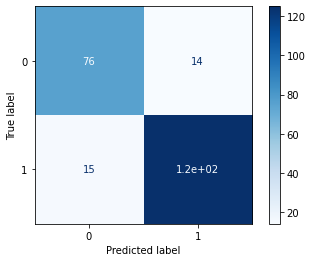

In [90]:
plot_confusion_matrix(knn_gs, X_test, y_test, cmap = 'Blues');

Now we will Look at all the metrics for the Random Forest Model

In [91]:
print('RF_GS Training Metrics\n')
evaluate_classification(y_train, rf_gs.predict(X_train), average='macro')
print('\n')

print('RF_GS Testing Metrics\n')
evaluate_classification(y_test, rf_gs.predict(X_test), average='macro')

RF_GS Training Metrics

Accuracy: 0.9665211062590975 
Recall: 0.9656633174386922 
Precision: 0.9671669713485161 
F1 Score: 0.9663129752927708


RF_GS Testing Metrics

Accuracy: 0.8739130434782608 
Recall: 0.8726190476190476 
Precision: 0.8660818713450292 
F1 Score: 0.868894348894349


In [92]:
print('Classification Report for RF_GS Training Set')
train_report = classification_report(y_train, rf_gs.predict(X_train))
print(train_report)

print('Confusion Matrix for RF_GS Training Set')
train_conf_mat = confusion_matrix(y_train, rf_gs.predict(X_train))
print(train_conf_mat)

print('\n\n')

print('Classification Report for RF_GS Testing Set')

test_report = classification_report(y_test, rf_gs.predict(X_test))
print(test_report)

print('Confusion Matrix for RF_GS Testing Set')
test_conf_mat = confusion_matrix(y_test, rf_gs.predict(X_test))
print(test_conf_mat)

Classification Report for RF_GS Training Set
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       320
           1       0.96      0.98      0.97       367

    accuracy                           0.97       687
   macro avg       0.97      0.97      0.97       687
weighted avg       0.97      0.97      0.97       687

Confusion Matrix for RF_GS Training Set
[[305  15]
 [  8 359]]



Classification Report for RF_GS Testing Set
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        90
           1       0.91      0.88      0.89       140

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230

Confusion Matrix for RF_GS Testing Set
[[ 78  12]
 [ 17 123]]


We can see the RF model worked exceptionally well on both the training and test sets 

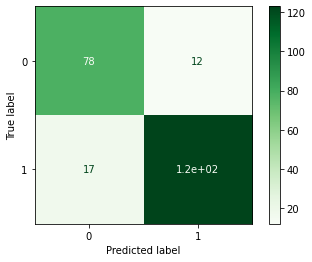

In [93]:
plot_confusion_matrix(rf_gs, X_test, y_test, cmap = 'Greens');

I chose the KNN model for Classificaion as it has a high acuracy score for both Training and Testing Data. This model performed best with the  parameters N= 10 and p = 2. It also has the loweer Type one and type 2 errors which shows their was less error in our preditions for this model. This model out performed the Random Fandom forest mnodel.